In [1]:

import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import yaml
from munch import DefaultMunch
# Set random seed for reproducibility
manualSeed = 123
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  123


In [3]:
cfg_path = './config.yml'
with open(cfg_path, "r") as f:
    print(f"Loading config file: {cfg_path}")
    cfg = yaml.safe_load(f)
cfg = DefaultMunch.fromDict(cfg)

Loading config file: ./config.yml


Data downloaded from [here](https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=drive_link&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ)

In [4]:
#dataroot='/home/user/PyTorch-Lightning-GAN/GAN/celeba'
dataroot = cfg.data_dir
#image_size = 64
image_size = cfg.img_size
#batch_size = 128
batch_size = cfg.batch_size
workers = 2
#nchannels = 3
nchannels = cfg.img_ch
# Size of feature maps in generator
ngf = 2*image_size

# Size of feature maps in discriminator
ndf = image_size

# Number of training epochs
#num_epochs =5
num_epochs = cfg.epochs

# Learning rate for optimizers
#lr = 0.0002
lr=cfg.lr.g
# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5
# Size of z latent vector (i.e. size of generator input)
#nz = 100
nz=cfg.zdim

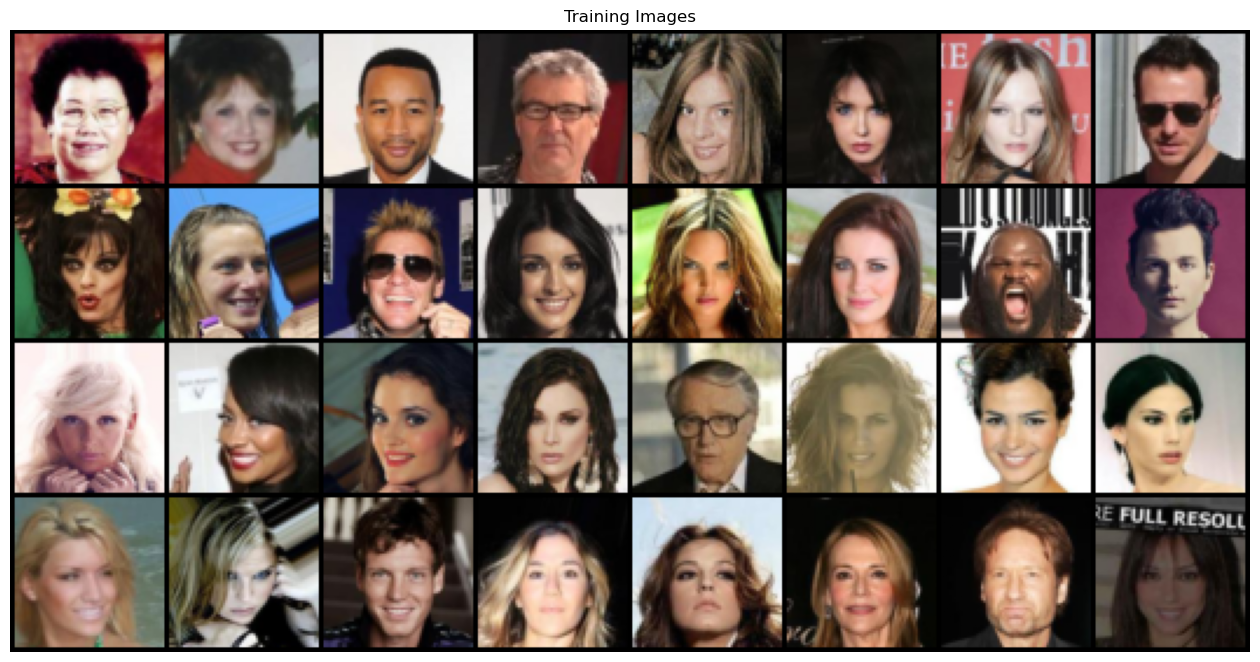

In [45]:

# We can use an image folder dataset the way we have it setup.
# Create the dataset

dataset1 = dset.ImageFolder(root=cfg.data_dir,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               #transforms.Resize((image_size,image_size)),
                               transforms.CenterCrop((image_size,image_size)),
                               transforms.ToTensor(),
                               #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
dataset2 = dset.ImageFolder(root=cfg.data_dir,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               #transforms.Resize((image_size,image_size)),
                               transforms.ToTensor(),
                               #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset1, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(16,16))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:32], padding=2, normalize=True).cpu(),(1,2,0)))

In [46]:
x=dataset1[0][0]
y=dataset2[0][0]

In [47]:
x.size()

torch.Size([3, 64, 64])

In [48]:
y.size()

torch.Size([3, 78, 64])